In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import pi
from random import randint
import numpy.random as rand
import matplotlib.colors as colors
cconverter=colors.ColorConverter()

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
r = 100
f_surface = .75

In [11]:
lat = np.linspace(-np.pi/2, np.pi/2, 60)
lon = np.linspace(-np.pi,   np.pi,  120)
x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))

In [12]:
el_colors = np.full(x3d.shape, "y", dtype=str)
N_elems = len(lat)*len(lon)
N_spots = int(f_surface*N_elems)
for n in range(N_spots):
    x_spot = rand.randint(0, x3d.shape[0])
    y_spot = rand.randint(0, x3d.shape[1])
    
    el_colors[x_spot, y_spot] = "r"

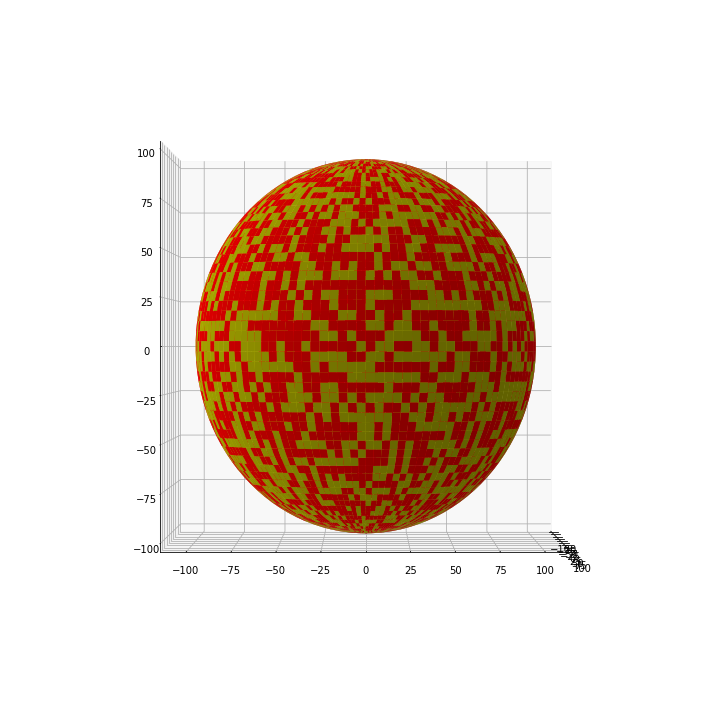

In [13]:
fig = plt.figure(figsize=(10,10))

ax  = fig.add_subplot(111, projection="3d")

sp = ax.plot_surface(x3d, y3d, z3d, rstride=1, cstride=1, facecolors=el_colors, linewidth=0)

ax.view_init(azim=360,elev=0)

fig.tight_layout()

In [14]:
fluxes = np.empty((lon.shape[0], lat.shape[0], 1))
specks = np.empty((lon.shape[0], lat.shape[0], 1), dtype="U1")

for i in range(len(lon)):
    for j in range(len(lat)):
        if el_colors[i, j] == 'r':
            b = 0.8
        else:
            b = 1.0
        fluxes[i, j] = b
        specks[i, j] = el_colors[i, j]
        
#for i in range(90):
#    for j in range(60):    
#        pl=plt.plot(x3d[i], y3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.plot(x3d[i], -3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.ylim(top=100)
#        plt.ylim(bottom = -100)

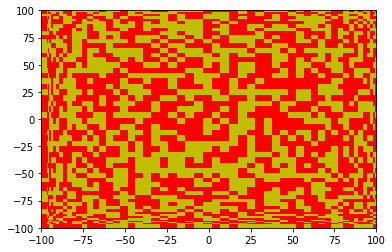

In [15]:
xp  = r*np.sin(lon+np.pi/2)
yp  = r*np.sin(lat)
zp = 30
for i in range(60):
    for j in range(60):
        if zp + i < xp.shape[0]:
            k = zp + i
        elif zp + i >= 120:
            k = i - (xp.shape[0] - zp)
        else:
            print("Whoops")
            break
        pl=plt.plot(-xp[i], -yp[j], 's', ms = 8.0, c=specks[k, j][0])
        plt.ylim(-r, r)
        plt.xlim(-r, r)

Text(0,0.5,'Brightness')

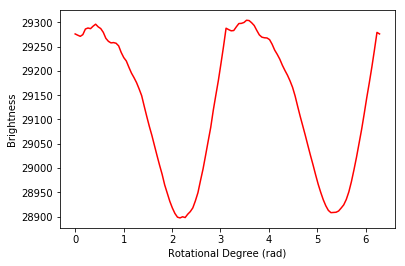

In [26]:
delta_phi = 120
phi = np.linspace(0,(2)*np.pi,delta_phi)
y  = r*np.sin(lat)
spot_ratio = .5
flux_data = []


for q in range(delta_phi):
    deltaX = []
    deltaY = []
    apc = []
    fpc = []
    spot_data = []
    x  = r*np.sin(lon+np.pi/2+phi[q])
    
    for i in range(60):
        #if x[i] > 0:
        deltaX.append(np.absolute((x[i]-x[i+1])))
        
    del deltaX[0]
        
    for i in range(59):
        deltaY.append(np.absolute((y[i]-y[i+1])))

    for i in range(len(deltaX)):
        for l in range(len(deltaY)):
            apc.append(deltaX[i]*deltaY[l])
            if specks[i, l] == 'r':
                spot_data.append(spot_ratio)
            else:
                spot_data.append(1)
        
    for i in range(len(apc)):
        fpc.append(apc[i]*spot_data[i])

    flux_received = sum(fpc)
    #print(flux_received)
    flux_data.append(flux_received)
    
fig=plt.plot(phi,flux_data,'r')
plt.xlabel('Rotational Degree (rad)')
plt.ylabel('Brightness')

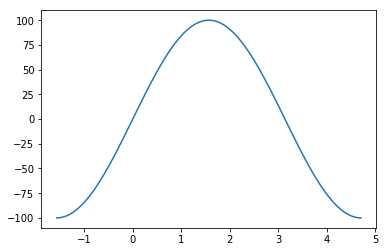

In [28]:
plt.plot(lon+np.pi/2,x)